In [1]:
from jw_package import *
from filling_missing import *
from functools import *

import configuration completed !
train + key + weather merging started
train + key + weather merging finished
function configuration completed ! 
Good to go !


In [2]:
each_station = []

for station_nbr in range(1,21):
    file_path = '../data/weather_partial_mean_all_best_close/{:02}.csv'.format(station_nbr)
    station = pd.read_csv(file_path,index_col=0)
    each_station.append(station)

weather = reduce((lambda x,y : x.append(y)),each_station)

In [3]:
etc = ['date','day','month','year','station_nbr','store_nbr']
category = ['sunrise','sunset','codesum']

In [18]:
etc = ['date','day','month','year','station_nbr']
category = ['sunrise','sunset','codesum']

In [183]:
weather.columns

Index(['avgspeed', 'codesum', 'cool', 'date', 'day', 'depart', 'dewpoint',
       'heat', 'month', 'preciptotal', 'resultdir', 'resultspeed', 'sealevel',
       'snowfall', 'station_nbr', 'stnpressure', 'sunrise', 'sunset', 'tavg',
       'tmax', 'tmin', 'wetbulb', 'year'],
      dtype='object')

In [19]:
sales = pd.read_csv('../data/basic/train.csv')
keys = pd.read_csv('../data/basic/key.csv')

In [20]:
data = sales.merge(keys).merge(weather)

In [21]:
for each in etc+category:
    data.drop(each,axis=1,inplace=True)

In [22]:
data = data[data['units']!=0]

In [110]:
formula = columns_to_relation(data.columns,None,'units',False)

In [23]:
formula = 'units ~ C(store_nbr) + C(item_nbr)+avgspeed + cool + depart + dewpoint + heat + preciptotal + resultdir + resultspeed + sealevel + snowfall + stnpressure + tavg + tmax + tmin + wetbulb'

In [15]:
formula = 'units ~ + C(item_nbr)+avgspeed + cool + depart + dewpoint + heat + preciptotal + resultdir + resultspeed + sealevel + snowfall + stnpressure + tavg + tmax + tmin + wetbulb'

In [321]:
formula = 'units ~ avgspeed + cool + depart + dewpoint + heat + preciptotal + resultdir + resultspeed + sealevel + snowfall + stnpressure + tmax + tmin + wetbulb'

'units ~ avgspeed + cool + depart + dewpoint + heat + preciptotal + resultdir + resultspeed + sealevel + snowfall + stnpressure + tavg + tmax + tmin + wetbulb'

In [299]:
results=[0,]
mean = 0
n = 0
for item_nbr in range(1,112):
    frame = data[data['item_nbr']==item_nbr]
    model = sm.OLS.from_formula(formula,data=frame)
    
    r2 = model.fit().rsquared
    
    if not np.isnan(r2):
#         print(item_nbr, r2)
        mean+=r2
        n+=1
    
    if r2>=0.3:
        print(item_nbr,r2)
    
    results.append(model)

23 0.485189133497
25 0.836942264397
36 0.395932457261
37 0.301332412535
96 0.375881778752
102 0.499453270853
109 0.342830239776


In [327]:
results=[0,]
mean = 0
n = 0
print(data['store_nbr'].unique())
for store_nbr in data['store_nbr'].unique():
    store = data[data['store_nbr']==store_nbr]
    
    store_result=[]
    
    for item_nbr in store['item_nbr'].unique():
        
        frame = store[store['item_nbr']==item_nbr]
        
        model = sm.OLS.from_formula(formula,data=frame)
        
        r2 = model.fit().rsquared
        
        if not np.isnan(r2):
            
            if r2>0.15:
                print(store_nbr, item_nbr, r2)
            
            mean+=r2
            n+=1
        
        store_result.append(model)
        
    results.append(store_result)
    


[ 1  2  6 38 42  3 20 28  4 24  5 10 41 44  7 13  8  9 18 23 26 31 34 11 22
 27 12 43 14 45 15 25 32 37 40 16 17 19 21 29 33 30 36 39 35]
1 40 0.155809874511
1 89 0.22193869154
2 85 0.318899618872
2 93 0.169890465636
38 93 0.165100034779
38 86 0.468897420712
3 93 0.222495871817
3 102 0.499453270853
20 93 0.198488385049
20 106 0.651183558615
4 93 0.194425124444
4 97 0.201793233121
4 96 0.351799312842
24 97 0.262537016831
10 86 0.368088452476
41 86 0.229052492481
44 93 0.177513647889
44 105 0.190651355882
7 93 0.258660071459
13 93 0.192064540679
13 104 0.448196422606
8 84 0.338563520169
9 105 0.271298349204
23 56 0.154527028417
31 104 0.538076210886
34 84 0.402163705226
11 86 0.177084847095
22 93 0.170254856521
22 104 0.402647505495
27 93 0.210736684089
12 93 0.242380636215
12 86 0.269147323699
43 93 0.242691126593
43 105 0.403223915255
14 50 0.216123970192
14 93 0.191923382225
14 88 0.2841873658
14 15 0.326781687694
45 34 0.244772807543
15 49 0.368676334516
15 93 0.183767337317
15 86 0.

In [330]:
data.head()

,store_nbr,item_nbr,units,avgspeed,cool,depart,dewpoint,heat,preciptotal,resultdir,resultspeed,sealevel,snowfall,stnpressure,tavg,tmax,tmin,wetbulb
8,1,9,29,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
27,1,28,2,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
50,1,51,1,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
119,1,9,60,10.3,0.0,11.0,26.0,24.0,0.01,24.0,9.8,29.62,0.0,29.44,41.0,50.0,31.0,35.0
138,1,28,5,10.3,0.0,11.0,26.0,24.0,0.01,24.0,9.8,29.62,0.0,29.44,41.0,50.0,31.0,35.0


In [16]:
results = [0, ]
mean = 0
n = 0
tt = formula+'+0'
print(data['store_nbr'].unique())
for store_nbr in range(1,46):
    store = data[data['store_nbr'] == store_nbr]

    model = sm.OLS.from_formula(tt, data=store)

    results.append(model.fit())

    r2 = model.fit().rsquared

    if not np.isnan(r2):
        print(store_nbr, r2)
        mean += r2
        n += 1

[ 1  2  6 38 42  3 20 28  4 24  5 10 41 44  7 13  8  9 18 23 26 31 34 11 22
 27 12 43 14 45 15 25 32 37 40 16 17 19 21 29 33 30 36 39 35]
1 0.45225213718
2 0.707874671062
3 0.572909868923
4 0.745372245959
5 0.674998082425
6 0.493327188526
7 0.543904413568
8 0.453353851048
9 0.67519917188
10 0.600102750107
11 0.535261298375
12 0.60421787259
13 0.504944306488
14 0.234536666811
15 0.634556370679
16 0.857079415908
17 0.554368499511
18 0.392006937831
19 0.469809160256
20 0.558068336706
21 0.661784231253
22 0.47887548405
23 0.629920116638
24 0.436019045233
25 0.687828536387
26 0.405523944555
27 0.473937381009
28 0.547692077575
29 0.609178479417
30 0.689941956011
31 0.728038345292
32 0.612028275344
33 0.652576262063
34 0.727846621358
35 0.394507444299
36 0.63134859262
37 0.0390383453511
38 0.649661830918
39 0.193181585861
40 0.588677815415
41 0.471988661311
42 0.501314359802
43 0.635663352128
44 0.639639725394
45 0.332793710086


In [25]:
model = sm.OLS.from_formula(formula,data=data)

In [26]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  units   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     986.8
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        09:13:58   Log-Likelihood:            -5.7717e+05
No. Observations:              118696   AIC:                         1.155e+06
Df Residuals:                  118526   BIC:                         1.156e+06
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            160.3171     22.581      7.100      0.000     116.058     204.576
C(store_nbr)[T.2]     36.7717      2.137     17.208      0.000      32.583      40.960
C(store_nbr)[T.3]     26.8383      2.102     12.766      0.000      22.718      30.959
C(store_nbr)[T.4]     79.6787      1.572     50.687      0.000      76.598      82.760
C(store_nbr)[T.5]     26.9141      1.260     21.356      0.000      24.444      29.384
C(store_nbr)[T.6]     21.5720      2.118     10.187      0.000      17.421      25.723
C(store_nbr)[T.7]     31.7229      1.406     22.557      0.000      28.966      34.479
C(store_nbr)[T.8]     10.9784      1.501      7.312      0.000       8.036      13.921
C(store_nbr)[T.9]     19.8730      1.416     14.038      0.000      17.098      22.648
C(store_nbr)[T.10]    30.8181      1.193     25.827      0.000      28.479      33.157
C(store_nbr)[T.11]    11.3615      1.193      9.522      0.000       9.023      13.700
C(store_nbr)[T.12]    33.5841      1.250     26.878      0.000      31.135      36.033
C(store_nbr)[T.13]    38.9158      1.377     28.252      0.000      36.216      41.616
C(store_nbr)[T.14]   -31.9611      1.228    -26.019      0.000     -34.369     -29.553
C(store_nbr)[T.15]    45.1503      8.033      5.621      0.000      29.407      60.894
C(store_nbr)[T.16]    55.7596      1.858     30.013      0.000      52.118      59.401
C(store_nbr)[T.17]    94.6129      1.451     65.225      0.000      91.770      97.456
C(store_nbr)[T.18]     6.8896      1.459      4.722      0.000       4.030       9.749
C(store_nbr)[T.19]    19.5207      1.410     13.844      0.000      16.757      22.284
C(store_nbr)[T.20]    41.1914      2.176     18.928      0.000      36.926      45.457
C(store_nbr)[T.21]    -0.3022      1.472     -0.205      0.837      -3.186       2.582
C(store_nbr)[T.22]    15.1438      1.185     12.781      0.000      12.821      17.466
C(store_nbr)[T.23]    -4.1878      1.427     -2.935      0.003      -6.985      -1.391
C(store_nbr)[T.24]    85.6117      4.621     18.528      0.000      76.555      94.668
C(store_nbr)[T.25]    55.2566      8.027      6.884      0.000      39.523      70.990
C(store_nbr)[T.26]     8.6965      1.421      6.119      0.000       5.911      11.482
C(store_nbr)[T.27]     9.6504      1.168      8.260      0.000       7.360      11.940
C(store_nbr)[T.28]     7.7136      2.123      3.633      0.000       3.552      11.875
C(store_nbr)[T.29]    20.6123      1.532     13.453      0.000      17.609      23.615
C(store_nbr)[T.30]    48.8433      1.502     32.523      0.000      45.900      51.787
C(store_nbr)[T.31]    27.5610      1.369     20.130      0.000      24.878      30.245
C(store_nbr)[T.32]    17.8175      8.022      2.221      0.026       2.094      33.541
C(store_nbr)[T.33]    89.9042      1.4

In [17]:
results[31].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  units   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     450.3
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        09:07:18   Log-Likelihood:                -13438.
No. Observations:                3047   AIC:                         2.691e+04
Df Residuals:                    3028   BIC:                         2.703e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(item_nbr)[9]      25.0788      0.849     29.546      0.000      23.415      26.743
C(item_nbr)[45]     58.9625      0.849     69.466      0.000      57.298      60.627
C(item_nbr)[67]    -14.4574      0.948    -15.250      0.000     -16.316     -12.599
C(item_nbr)[93]    -20.4731      1.471    -13.913      0.000     -23.358     -17.588
C(item_nbr)[98]    -23.9887      1.081    -22.190      0.000     -26.108     -21.869
C(item_nbr)[104]   -24.9293      2.745     -9.081      0.000     -30.312     -19.547
avgspeed            -0.1120      0.340     -0.329      0.742      -0.779       0.555
cool                -3.8947      1.273     -3.059      0.002      -6.391      -1.398
depart              -0.0835      0.057     -1.477      0.140      -0.194       0.027
dewpoint             0.3333      0.116      2.880      0.004       0.106       0.560
heat                 4.5060      1.286      3.504      0.000       1.985       7.027
preciptotal         -2.0663      1.762     -1.173      0.241      -5.522       1.389
resultdir            0.0261      0.040      0.652      0.514      -0.052       0.105
resultspeed          0.0161      0.310      0.052      0.958      -0.591       0.623
sealevel            -5.2233     12.334     -0.423      0.672     -29.407      18.960
snowfall         -2.862e-15   1.63e-14     -0.176      0.861   -3.48e-14    2.91e-14
stnpressure         -3.0731     12.183     -0.252      0.801     -26.961      20.814
tavg                 4.1326      1.495      2.764      0.006       1.201       7.064
tmax                -0.0532      0.367     -0.145      0.885      -0.774       0.667
tmin                -0.1008      0.368     -0.274      0.784      -0.823       0.621
wetbulb             -0.1178      0.173     -0.682      0.496      -0.457       0.221
==============================================================================
Omnibus:                     1585.657   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47671.417
Skew:                           1.883   Prob(JB):                         0.00
Kurtosis:                      22.008   Cond. No.                     9.47e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.67e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [358]:
results[31].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  units   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     450.3
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:14:48   Log-Likelihood:                -13438.
No. Observations:                3047   AIC:                         2.691e+04
Df Residuals:                    3028   BIC:                         2.703e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2105      0.060      3.480      0.001       0.092       0.329
C(item_nbr)[T.45]     33.8837      0.919     36.890      0.000      32.083      35.685
C(item_nbr)[T.67]    -39.5362      1.053    -37.559      0.000     -41.600     -37.472
C(item_nbr)[T.93]    -45.5519      1.731    -26.310      0.000     -48.947     -42.157
C(item_nbr)[T.98]    -49.0675      1.232    -39.823      0.000     -51.483     -46.652
C(item_nbr)[T.104]   -50.0081      3.326    -15.035      0.000     -56.530     -43.486
avgspeed              -0.1120      0.340     -0.329      0.742      -0.779       0.555
cool                  -4.2773      1.272     -3.362      0.001      -6.772      -1.782
depart                -0.0835      0.057     -1.477      0.140      -0.194       0.027
dewpoint               0.3333      0.116      2.880      0.004       0.106       0.560
heat                   4.8886      1.285      3.804      0.000       2.369       7.408
preciptotal           -2.0663      1.762     -1.173      0.241      -5.522       1.389
resultdir              0.0261      0.040      0.652      0.514      -0.052       0.105
resultspeed            0.0161      0.310      0.052      0.958      -0.591       0.623
sealevel              -5.2233     12.334     -0.423      0.672     -29.407      18.960
snowfall            1.352e-14   3.81e-15      3.546      0.000    6.05e-15     2.1e-14
stnpressure           -3.0731     12.183     -0.252      0.801     -26.961      20.814
tavg                   4.5152      1.494      3.021      0.003       1.585       7.446
tmax                  -0.0532      0.367     -0.145      0.885      -0.774       0.667
tmin                  -0.1008      0.368     -0.274      0.784      -0.823       0.621
wetbulb               -0.1178      0.173     -0.682      0.496      -0.457       0.221
==============================================================================
Omnibus:                     1585.657   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47671.417
Skew:                           1.883   Prob(JB):                         0.00
Kurtosis:                      22.008   Cond. No.                     1.52e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.59e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [350]:
aaa = data[(data['store_nbr']==31)]

In [351]:
aaa['item_nbr'].unique()

array([  9,  45,  93,  67,  98, 104], dtype=int64)

In [329]:
formula

'units ~ avgspeed + cool + depart + dewpoint + heat + preciptotal + resultdir + resultspeed + sealevel + snowfall + stnpressure + tmax + tmin + wetbulb'

In [303]:
data.head()

,item_nbr,units,avgspeed,cool,depart,dewpoint,heat,preciptotal,resultdir,resultspeed,sealevel,snowfall,stnpressure,tavg,tmax,tmin,wetbulb
8,9,29,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
27,28,2,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
50,51,1,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
119,9,60,10.3,0.0,11.0,26.0,24.0,0.01,24.0,9.8,29.62,0.0,29.44,41.0,50.0,31.0,35.0
138,28,5,10.3,0.0,11.0,26.0,24.0,0.01,24.0,9.8,29.62,0.0,29.44,41.0,50.0,31.0,35.0


In [24]:
model = sm.OLS.from_formula(formula,data=data)

In [313]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  units   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     687.1
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:28:38   Log-Likelihood:            -5.9696e+05
No. Observations:              118696   AIC:                         1.194e+06
Df Residuals:                  118570   BIC:                         1.195e+06
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.7167     26.006     -0.297      0.767     -58.688      43.255
C(item_nbr)[T.2]       0.0040      2.465      0.002      0.999      -4.828       4.836
C(item_nbr)[T.3]       2.0551      3.138      0.655      0.513      -4.096       8.206
C(item_nbr)[T.4]       0.3339      3.458      0.097      0.923      -6.443       7.111
C(item_nbr)[T.5]      46.7921      2.150     21.768      0.000      42.579      51.005
C(item_nbr)[T.6]      39.2940      2.449     16.046      0.000      34.494      44.094
C(item_nbr)[T.7]      -0.4804      2.927     -0.164      0.870      -6.216       5.256
C(item_nbr)[T.8]      30.2471      2.458     12.306      0.000      25.430      35.064
C(item_nbr)[T.9]      55.7913      2.150     25.954      0.000      51.578      60.005
C(item_nbr)[T.10]      0.4041      2.934      0.138      0.890      -5.346       6.154
C(item_nbr)[T.11]     -2.6756      2.999     -0.892      0.372      -8.553       3.202
C(item_nbr)[T.12]     -8.7623      2.978     -2.942      0.003     -14.599      -2.926
C(item_nbr)[T.13]      0.1594      3.227      0.049      0.961      -6.165       6.484
C(item_nbr)[T.14]     -2.5972      3.610     -0.719      0.472      -9.674       4.479
C(item_nbr)[T.15]     -1.7780      2.607     -0.682      0.495      -6.887       3.331
C(item_nbr)[T.16]     30.7972      2.177     14.149      0.000      26.531      35.063
C(item_nbr)[T.17]     -7.9933      2.880     -2.775      0.006     -13.638      -2.348
C(item_nbr)[T.18]     -3.6734      2.895     -1.269      0.204      -9.347       2.000
C(item_nbr)[T.19]     -8.6494      2.888     -2.995      0.003     -14.310      -2.989
C(item_nbr)[T.20]      1.5193      2.711      0.560      0.575      -3.795       6.833
C(item_nbr)[T.21]      1.3018      2.464      0.528      0.597      -3.528       6.131
C(item_nbr)[T.22]      2.1749      4.568      0.476      0.634      -6.777      11.127
C(item_nbr)[T.23]     17.1774      2.298      7.476      0.000      12.674      21.681
C(item_nbr)[T.24]      7.8365      3.109      2.521      0.012       1.743      13.930
C(item_nbr)[T.25]     80.9942      2.308     35.086      0.000      76.470      85.519
C(item_nbr)[T.26]      2.6777      2.492      1.075      0.283      -2.207       7.562
C(item_nbr)[T.27]      7.6622      2.450      3.127      0.002       2.860      12.465
C(item_nbr)[T.28]      4.3005      2.466      1.744      0.081      -0.532       9.134
C(item_nbr)[T.29]      0.0485      2.726      0.018      0.986      -5.294       5.391
C(item_nbr)[T.30]     -0.6080      2.602     -0.234      0.815      -5.709       4.493
C(item_nbr)[T.31]     -0.1944      2.965     -0.066      0.948      -6.006       5.617
C(item_nbr)[T.32]      1.5630      3.047      0.513      0.608      -4.408       7.534
C(item_nbr)[T.33]     -0.3162      3.2

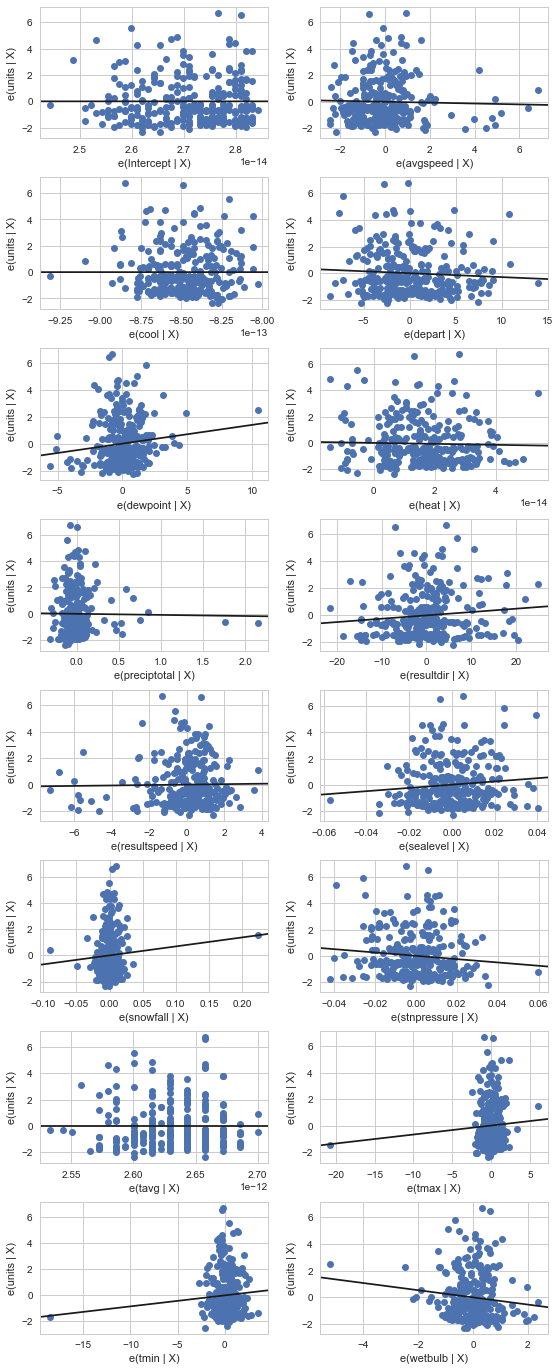

In [189]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(results[1].fit(), fig=fig)
fig.suptitle("")
plt.show()

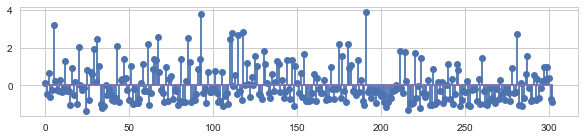

In [191]:
plt.figure(figsize=(10, 2))
plt.stem(results[1].fit().resid_pearson)
plt.show()

In [295]:
res = results[1].fit().resid_pearson
index = results[1].fit().resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index,data=results[1].fit().resid_pearson)
# row
drop_index = row[outlier_index].index
tmp.drop(list(drop_index),inplace=True)

In [60]:
def vif(dfX0):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["vif"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
    vif["features"] = dfX0.columns
    vif.sort_values(by='vif',ascending=False, inplace=True)
    
    return vif

In [195]:
tmp = data.copy()

In [197]:
a = ['item_nbr','units']
for each in a:
    tmp.drop(each,axis=1,inplace=True)

In [198]:
vif(tmp)

,vif,features
11,14652.410606,tavg
8,14292.978748,sealevel
4,879.227767,heat
14,572.794438,wetbulb
12,568.433221,tmax
10,420.274818,stnpressure
13,338.634075,tmin
1,298.094001,cool
3,136.537959,dewpoint
0,32.991818,avgspeed


In [199]:
tmp.drop('tavg',axis=1,inplace=True)
tmp.drop('sealevel',axis=1,inplace=True)

In [200]:
vif(tmp)

,vif,features
12,564.142056,wetbulb
9,299.572986,stnpressure
11,200.577984,tmin
10,189.583120,tmax
3,131.727765,dewpoint
0,31.587775,avgspeed
4,20.736767,heat
7,20.295075,resultspeed
1,9.647145,cool
6,5.005471,resultdir


In [204]:
vif(tmp)

,vif,features
9,287.147402,stnpressure
11,171.029572,tmin
10,139.169014,tmax
3,64.515873,dewpoint
0,31.578181,avgspeed
4,20.486034,heat
7,20.255864,resultspeed
1,9.630362,cool
6,5.005459,resultdir
2,2.476593,depart


In [206]:
tmp.drop('stnpressure',axis=1,inplace=True)
vif(tmp)

,vif,features
10,138.430705,tmin
9,67.778409,tmax
3,57.845716,dewpoint
0,29.118660,avgspeed
7,18.485110,resultspeed
6,4.967214,resultdir
1,3.688091,cool
4,2.513277,heat
2,2.447377,depart
5,1.212883,preciptotal


In [207]:
tmp.drop('tmin',axis=1,inplace=True)

In [208]:
vif(tmp)

,vif,features
9,38.927114,tmax
3,29.764037,dewpoint
0,28.892842,avgspeed
7,18.414832,resultspeed
6,4.958111,resultdir
1,3.107476,cool
2,2.444529,depart
4,2.296742,heat
5,1.209242,preciptotal
8,1.102904,snowfall


In [209]:
tmp.drop('tmax',axis=1,inplace=True)
vif(tmp)

,vif,features
0,24.973485,avgspeed
7,16.928010,resultspeed
3,7.973015,dewpoint
6,4.491019,resultdir
1,3.065566,cool
2,2.426866,depart
4,2.275303,heat
5,1.155074,preciptotal
8,1.097728,snowfall


In [210]:
tmp.drop('avgspeed',axis=1,inplace=True)
vif(tmp)

,vif,features
2,7.246957,dewpoint
5,4.289320,resultdir
6,3.466973,resultspeed
0,3.048391,cool
1,2.421736,depart
3,2.167398,heat
4,1.148081,preciptotal
7,1.097551,snowfall


In [212]:
vif(tmp)['features'].values

array(['dewpoint', 'resultdir', 'resultspeed', 'cool', 'depart', 'heat',
       'preciptotal', 'snowfall'], dtype=object)

In [256]:
formula = 'units ~ scale(dewpoint) + scale(resultdir) + scale(resultspeed)+ scale(cool)+ scale(depart)+ scale(heat)+ scale(preciptotal)+ scale(snowfall)'

In [291]:
formula = 'units ~ dewpoint + resultdir + resultspeed+ cool+ depart+ heat+ preciptotal+ snowfall'

In [260]:
formula

'units ~ scale(dewpoint) + scale(resultdir) + scale(resultspeed)+ scale(cool)+ scale(depart)+ scale(heat)+ scale(preciptotal)+ scale(snowfall)'

In [263]:
tmp.columns

Index(['cool', 'depart', 'dewpoint', 'heat', 'preciptotal', 'resultdir',
       'resultspeed', 'snowfall', 'units', 'item_nbr'],
      dtype='object')

In [265]:
tmp.dropna(axis=1,how='any').columns

Index(['cool', 'depart', 'dewpoint', 'heat', 'preciptotal', 'resultdir',
       'resultspeed', 'snowfall', 'units', 'item_nbr'],
      dtype='object')

In [296]:
results=[0,]
mean = 0
n = 0
for item_nbr in range(1,112):
    frame = tmp[tmp['item_nbr']==item_nbr]
    model = sm.OLS.from_formula(formula,data=frame)
    r2 = model.fit().rsquared
    
    if not np.isnan(r2):
#         print(item_nbr, r2)
        mean+=r2
        n+=1
    
    if r2>=0.3:
        print(item_nbr,r2)
    
    results.append(model)

In [297]:
results[1].fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  units   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.856
Date:                Sun, 11 Mar 2018   Prob (F-statistic):            0.00457
Time:                        20:23:08   Log-Likelihood:                -499.59
No. Observations:                 289   AIC:                             1017.
Df Residuals:                     280   BIC:                             1050.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7865      0.770      1.021      0.308      -0.730       2.303
dewpoint        0.0299      0.015      2.050      0.041       0.001       0.059
resultdir       0.0188      0.011      1.752      0.081      -0.002       0.040
resultspeed     0.0080      0.019      0.429      0.668      -0.029       0.045
cool           -0.0394      0.016     -2.519      0.012      -0.070      -0.009
depart         -0.0180      0.022     -0.830      0.407      -0.061       0.025
heat            0.0087      0.026      0.331      0.741      -0.043       0.061
preciptotal     0.0272      0.368      0.074      0.941      -0.697       0.751
snowfall       11.7490      3.565      3.296      0.001       4.732      18.766
==============================================================================
Omnibus:                       28.123   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.249
Skew:                           0.834   Prob(JB):                     3.66e-08
Kurtosis:                       2.757   Cond. No.                     2.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""